In [ ]:
""" this file makes heatmap of scimilarity vs yang's annotation"""

In [1]:
""" environment """
import scanpy as sc
import warnings
import utils_AT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data_path = '../data/KPTracer-Data/expression/adata_processed_comp_SCANTN.h5ad' #(AT)
data_path = '../data/KPTracer-Data/expression/adata_processed_combined_SCANTN.h5ad' #(AT)
adams_comp = sc.read(data_path)

In [27]:
tumor_names = adams_comp.obs['Tumor']
tumor_names_arr = np.array(tumor_names.unique())
KP_tumor_list = []
for tumor in tumor_names_arr:
     try:
          #if tumor.split("_")[1] == 'Apc':
          if tumor.split("_")[1] != 'NT':
               KP_tumor_list.append(tumor)
     except:
          print()
         
adams_comp_original = adams_comp
adams_comp = adams_comp[adams_comp.obs['Tumor'].isin(KP_tumor_list)]

In [28]:
column1_data = adams_comp.obs['Cluster-Name']
column2_data = adams_comp.obs['celltype_hint']

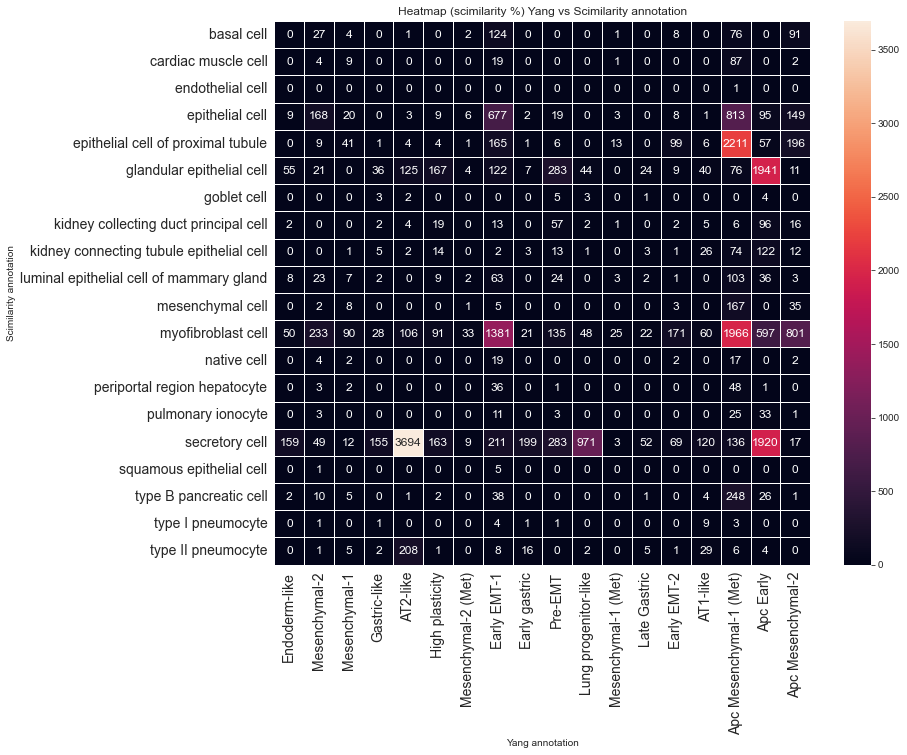

In [29]:
""" row wise (%) """

# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
annotation_matrix = frequency_matrix.astype(str)
# annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(1)).astype(str)
# percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
# sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})
sns.heatmap(frequency_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (scimilarity %) Yang vs Scimilarity annotation')
plt.savefig('heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

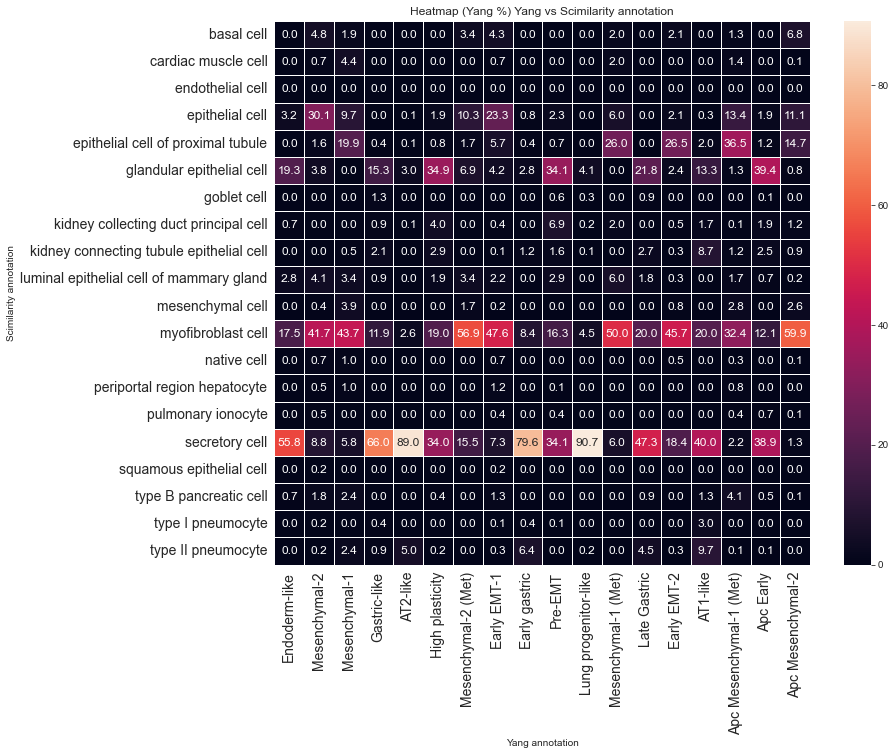

In [30]:
""" column wise (%) """
# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
#annotation_matrix = frequency_matrix.astype(str)
annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(1)).astype(str)
percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (Yang %) Yang vs Scimilarity annotation')
plt.savefig('heatmap_2.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [32]:
from scipy.stats import entropy
def add_epsilon(x):
    return x + epsilon
# Assume percentage_matrix is your DataFrame and 'x' is the name of your reference column
reference_distribution = percentage_matrix['Pre-EMT']

# Add a small constant to all probabilities to avoid log(0)
epsilon = 1e-10
reference_distribution += epsilon
# percentage_matrix = percentage_matrix.apply(lambda x: x + epsilon)
if percentage_matrix is not None:
    # Apply the function in a more controlled manner
    percentage_matrix = percentage_matrix.apply(add_epsilon)
else:
    print("percentage_matrix is None")
    
    
# Now, re-normalize the distributions so they sum to 1
reference_distribution /= reference_distribution.sum()
percentage_matrix = percentage_matrix.div(percentage_matrix.sum())

# Initialize an empty dictionary to store KL divergence values
kl_divergences = {}

# Loop through each column in the DataFrame
for column in percentage_matrix.columns:
    # Skip the comparison for the reference column itself
    if column == 'x':
        continue
    # Compute the KL divergence and store it in the dictionary
    kl_divergences[column] = entropy(reference_distribution, percentage_matrix[column])

# Convert the dictionary to a Series for easy viewing or further processing
kl_series = pd.Series(kl_divergences, name='KL Divergence')
# Sort the series from smallest to largest (ascending order)
sorted_kl_series = kl_series.sort_values()

print(sorted_kl_series)

Pre-EMT                    2.439473e-10
Apc Early                  1.052808e-01
High plasticity            2.207881e-01
Gastric-like               7.930449e-01
Endoderm-like              7.995689e-01
AT1-like                   1.087855e+00
Early EMT-1                1.346832e+00
Early EMT-2                1.401504e+00
AT2-like                   1.919475e+00
Late Gastric               2.078944e+00
Lung progenitor-like       2.128756e+00
Apc Mesenchymal-1 (Met)    2.290093e+00
Mesenchymal-2 (Met)        2.465755e+00
Apc Mesenchymal-2          2.478120e+00
Mesenchymal-2              2.783749e+00
Early gastric              2.851086e+00
Mesenchymal-1 (Met)        8.411457e+00
Mesenchymal-1              9.463008e+00
Name: KL Divergence, dtype: float64
